## Library Imports


In [31]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline

## FFT Function


In [32]:
# Define the 2D FFT function
def fft2(p):
    n, m = p.shape
    if n == 1 and m == 1:
        return p
    w_n = np.exp(-2j * np.pi / n)
    w_m = np.exp(-2j * np.pi / m)
    pe = fft2(p[::2, ::2])
    po = fft2(p[1::2, ::2])
    peo = fft2(p[::2, 1::2])
    poo = fft2(p[1::2, 1::2])
    y = np.zeros((n, m), dtype=np.complex128)
    for i in range(n//2):
        for j in range(m//2):
            y[i, j] = pe[i, j] + w_n**i * po[i, j] + w_m**j * \
                peo[i, j] + w_n**i * w_m**j * poo[i, j]
            y[i, j+m//2] = pe[i, j] + w_n**i * po[i, j] - \
                w_m**j * peo[i, j] - w_n**i * w_m**j * poo[i, j]
            y[i+n//2, j] = pe[i, j] - w_n**i * po[i, j] + \
                w_m**j * peo[i, j] - w_n**i * w_m**j * poo[i, j]
            y[i+n//2, j+m//2] = pe[i, j] - w_n**i * po[i, j] - \
                w_m**j * peo[i, j] + w_n**i * w_m**j * poo[i, j]
    return y

## IFFT Function


In [33]:
# Define the 2D IFFT function
def ifft2(p):
    n, m = p.shape
    if n == 1 and m == 1:
        return p
    w_n = np.exp(2j * np.pi / n)
    w_m = np.exp(2j * np.pi / m)
    pe = ifft2(p[::2, ::2])
    po = ifft2(p[1::2, ::2])
    pee = ifft2(p[::2, 1::2])
    poo = ifft2(p[1::2, 1::2])
    y = np.zeros((n, m), dtype=np.complex128)
    for i in range(n//2):
        for j in range(m//2):
            y[i, j] = pe[i, j] + w_n**i * po[i, j] + w_m**j * \
                pee[i, j] + w_n**i * w_m**j * poo[i, j]
            y[i, j+m//2] = pe[i, j] + w_n**i * po[i, j] - \
                w_m**j * pee[i, j] - w_n**i * w_m**j * poo[i, j]
            y[i+n//2, j] = pe[i, j] - w_n**i * po[i, j] + \
                w_m**j * pee[i, j] - w_n**i * w_m**j * poo[i, j]
            y[i+n//2, j+m//2] = pe[i, j] - w_n**i * po[i, j] - \
                w_m**j * pee[i, j] + w_n**i * w_m**j * poo[i, j]
    return y/(n*m)

## Generating gray scale image


(512, 512)


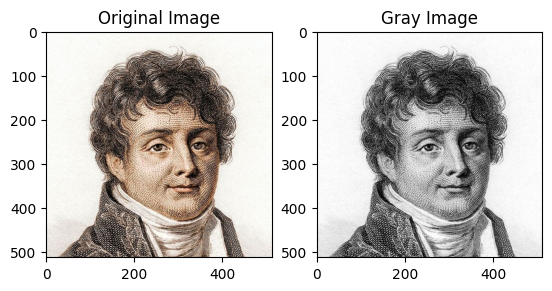

In [35]:
# convert the image to grayscale by
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.144])


# Load an RGB image
rgb_image = plt.imread('./data/fourier-512.jpg')

# Convert the image to grayscale
gray_image = rgb2gray(rgb_image)
print(np.shape(gray_image))

# Display the grayscale image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(rgb_image)
plt.subplot(1, 2, 2)
plt.title('Gray Image')
plt.imshow(gray_image, cmap='gray')

## Creating FFT of the image


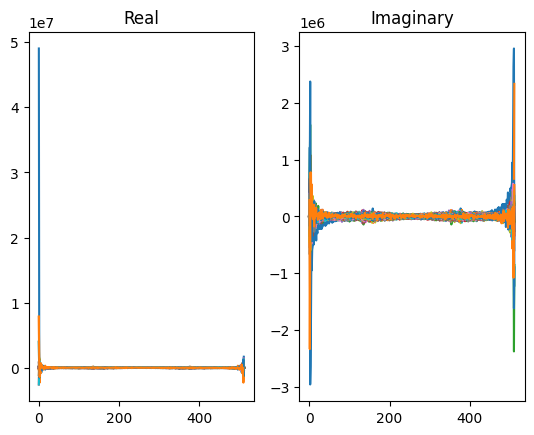

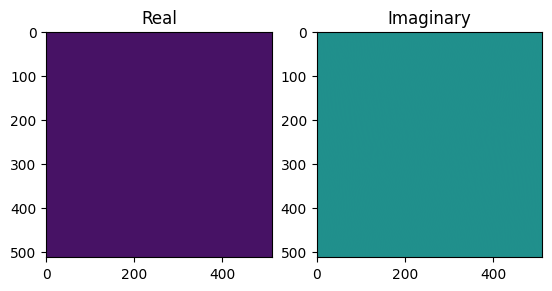

In [36]:
# Compute the 2D FFT of the input image
fft_image = fft2(gray_image)
plt.subplot(1, 2, 1)
plt.plot(np.real(fft_image))
plt.title('Real')
plt.subplot(1, 2, 2)
plt.title('Imaginary')
plt.plot(np.imag(fft_image))
plt.show()

plt.subplot(1, 2, 1)
plt.title('Real')
plt.imshow(np.real(fft_image))
plt.subplot(1, 2, 2)
plt.title('Imaginary')
plt.imshow(np.imag(fft_image))

## Regenerating the image from the FFT


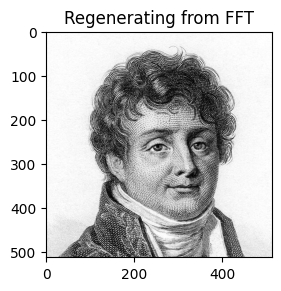

In [37]:
# Compute the 2D IFFT of the input image
ifft_image = ifft2(fft_image)
plt.subplot(1, 2, 1)
plt.title('Regenerating from FFT')
plt.imshow(np.real(ifft_image), cmap='gray')

## Creating watermark image for embedding


(512, 512)


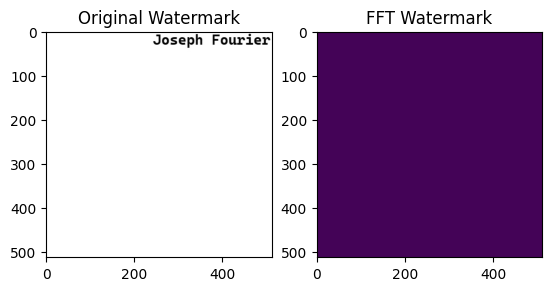

In [38]:
# creating watermark image
watermark = plt.imread('./data/joseph-512.jpg')
watermark = rgb2gray(watermark)
fft_watermark = fft2(watermark)
print(np.shape(watermark))

plt.subplot(1, 2, 1)
plt.title('Original Watermark')
plt.imshow(watermark, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('FFT Watermark')
plt.imshow(np.real(fft_watermark))

## Embedding the watermark in the fft image


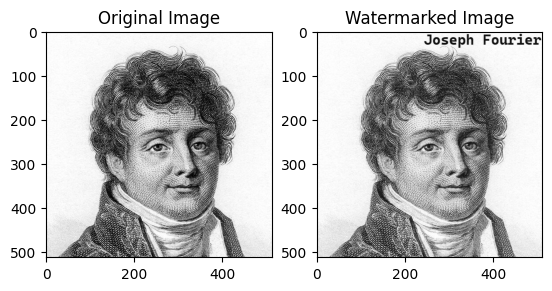

In [39]:
# embed the watermark
fft_watermarked_image = fft_image + fft_watermark
watermarked_iamge = ifft2(fft_watermarked_image)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Watermarked Image')
plt.imshow(np.real(watermarked_iamge), cmap='gray')

` The watermarked image seems fainter than the original image, due to the white background of the watermark which was created using MS paint.`
